# Final Project
### Môn học: CSC17104 - Lập trình cho Khoa học dữ liệu
****

**Nhóm 26**
<table style='float:left;'>
    <tr>
        <th style='text-align:center;'>MSSV</th>
        <th style='text-align:center;'>Họ và Tên</th>
        <th style='text-align:center;'>Mức độ hoàn thành(%)</th>
    </tr>
    <tr>
        <td style='text-align:center;'>21120178</td>
        <td style='text-align:left;'>Văn Bá Bảo Huy</td>
        <td style='text-align:center;'>100%</td>
    </tr>
    <tr>
        <td style='text-align:center;'>21120071</td>
        <td style='text-align:left;'>Nguyễn Thị Thanh Hoa</td>
        <td style='text-align:center;'>100%</td>
    </tr>
    <tr>
        <td style='text-align:center;'>21120174</td>
        <td style='text-align:left;'>Nguyễn Thị Gái</td>
        <td style='text-align:center;'>100%</td>
    </tr>
</table>

### Environment check & Import nescessary packages

In [1]:
import sys
sys.executable
!pip install -q kaggle

In [2]:
import os
import numpy as np
import pandas as pd
import json
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from skimage import io

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", message="Matplotlib is currently using module://matplotlib_inline.backend_inline")

# **Phase 1**: Collecting Data

**Dataset**: Full TMDB Movies Dataset 2023 (930K Movies)<br>
**Kaggle**: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data

In [3]:
#Download data from Kaggle with api-key
notebook_dir = os.path.dirname(os.path.realpath("__file__"))
os.chdir(notebook_dir)
!mkdir kaggle
!touch kaggle/kaggle.json
api_json = {"username":"tyzenr","key":"08b25d2b177116a2cb7dfddc38ab964b"}
with open('kaggle/kaggle.json', 'w') as file:
    json.dump(api_json, file)
!chmod 600 kaggle/kaggle.json

with open('kaggle/kaggle.json', 'r') as file:
    api_json = json.load(file)

os.environ['KAGGLE_USERNAME'] = api_json['username']
os.environ['KAGGLE_KEY'] = api_json['key']

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('asaniczka/tmdb-movies-dataset-2023-930k-movies', path='.', unzip=True)

'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


**1. Dữ liệu về chủ đề gì? Nguồn dữ liệu?**<br>
- Chủ đề dữ liệu: Bộ dữ liệu của hơn 930.000 bộ phim trong tập dữ liệu TMDB.<br>
- Nguồn dữ liệu: Kaggle
<br>

**2. Kiểm tra vấn đề bản quyền của tập dữ liệu.**<br>
- `CC0: Public Domain` - No Right Reserved
- CC0 cho phép các nhà khoa học, nhà giáo dục, nghệ sĩ, những người sáng tạo và chủ sở hữu khác của nội dung được bảo vệ bản quyền hoặc cơ sở dữ liệu *từ bỏ* những lợi ích đó đối với tác phẩm của họ và do đó đặt chúng hoàn toàn nhất có thể trong phạm vi công cộng, để những người khác có thể tự do xây dựng, nâng cao và tái sử dụng tác phẩm cho bất kỳ mục đích nào mà không bị hạn chế theo luật bản quyền hoặc cơ sở dữ liệu.
<br>

**3. Tác giả của tập dữ liệu đã thu thập bằng cách nào?** <br>
- Dữ liệu được thu thập từ TMDB Open API.
<br>

# **Phase 2**: Exploring Data

### 2.0 Đọc dữ liệu

In [4]:
df = pd.read_csv("TMDB_movie_dataset_v11.csv")
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"


### 2.1 Có bao nhiêu hàng và bao nhiêu cột?

In [5]:
row, col = df.shape[0], df.shape[1]
print('Dữ liệu có', row, 'hàng và', col, 'cột.')

Dữ liệu có 972627 hàng và 23 cột.


###  2.2 Ý nghĩa của mỗi hàng là gì?

### 2.3 Có 'hàng trùng lặp' không?

### 2.4 Ý nghĩa của từng cột là gì?

In [6]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

**Ý nghĩa từng cột**:

01. `id`: TMDB ID.
02. `title`: Tiêu đề của phim (bằng tiếng Anh).
03. `vote_average`: Điểm đánh giá trung bình trên trang TMDB.
04. `vote_count`: Số lượng đánh giá.
05. `status`:  Tình trạng bộ phim (đã công chiếu, lên kế hoạch công chiếu, ...).
06. `release_date`: Ngày công chiếu phim.
07. `revenue`: Doanh thu phim.
08. `runtime`: Thời lượng của phim.
09. `adult`: Bộ phim chỉ phù hợp cho người lớn (trên 18 tuổi).
10. `backdrop_path`: Đường dẫn đến ảnh nền phim.
12. `budget`: Kinh phí thực hiện phim.
13. `homepage`: Trang web chính thức của bộ phim.
14. `imdb_id`: IMDB ID.
15. `original_language`: Ngôn ngữ gốc của phim.
16. `original_title`: Tiêu đề gốc bộ phim.
17. `overview`: Mô tả ngắn về bộ phim.
18. `popularity`: Điểm đánh giá mức độ phổ biến của phim.
19. `poster_path`: Đường dẫn đến poster phim.
20. `tagline`:  Khẩu hiệu phim.
21. `genres`: Thể loại phim.
22. `production_companies`: Công ty sản xuất.
23. `production_countries`: Nước sản xuất.
24. `spoken_languages`: Ngôn ngữ sử dụng trong phim.

### 2.5 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

### 2.6 Với mỗi cột số, các giá trị được phân bố như thế nào?
- Phần trăm giá trị còn thiếu là bao nhiêu?
- Tối thiểu? tối đa? Chúng có bất thường không?

### 2.7 Với mỗi cột phân loại, các giá trị được phân bổ như thế nào?
- Phần trăm giá trị còn thiếu là bao nhiêu?
- Có bao nhiêu giá trị khác nhau? Hiển thị một số giá trị đó.
- Chúng có bất thường không?

In [7]:
object_df = df.select_dtypes(include='object')
obj_col_df = pd.DataFrame( index=['missing_ratio', 'diff_value', 'values'], columns=object_df.columns)

obj_col_df.loc['m0issing_ratio'] = (object_df.isna().sum() / object_df.size) *100
obj_col_df.loc['diff_value']    = object_df.nunique()
obj_col_df.loc['values']        = [object_df[col].sample(min(5, obj_col_df.loc['diff_value'][col])).tolist() for col in object_df.columns]

obj_col_df

ValueError: Must have equal len keys and value when setting with an ndarray

# **Phase 3**: Preprocessing & Asking Meaningful questions
Yêu cầu:
- Số lượng câu hỏi đặt ra cần lớn hơn hoặc bằng số lượng thành viên ($\ge 3$)
- Câu hỏi đặt ra cần có ý nghĩa (tác dụng của việc tìm kiếm câu trả lời cho câu hỏi đó) và không được quá dễ 🙂
- Chú ý đến chất lượng của từng câu hỏi, không phải số lượng câu hỏi.
- Trong file Notebook, với mỗi câu hỏi cần thể hiện được:
    - Nội dung câu hỏi
    - Ý nghĩa của câu hỏi

## **3.0** Preprocessing

#### Remove duplicated/meaningless rows and columns

Xóa các dòng trùng lặp: ở phần 2.3 ta đã phát hiện dữ liệu có các dòng trùng lặp, vì vậy ta sẽ tiến hành xóa các dòng đó.

In [8]:
df.drop_duplicates(inplace=True)

Xóa các cột không phù hợp (ở đây ta tiến hành xóa các cột không sử dụng trong quá trình xử lí dữ liệu và đặt câu hỏi.<br>
Ta tiến hành xóa các cột:<br>
- `backdrop_path`: Đường dẫn đến ảnh nền phim - Do để hiển thị ta đã có cột `poster_path`
- `homepage`: đường dẫn đến trang web chính thức của phim.
- `imdb_id`: IMDB ID - Do quá trình xử lí không lấy các thông tin trên IMDB.

In [9]:
df = df.drop(['backdrop_path', 'homepage', 'imdb_id'], axis=1)

Vì có chứa các thông tin không phù hợp, ta sẽ loại bỏ các dòng dữ liệu của cột `adult` có giá trị **True** và sau đó xóa cột này đi.

In [10]:
df = df[df['adult'] == False]
df = df.drop('adult', axis=1)

#### Handle missing data & Convert data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969743 entries, 0 to 969742
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    969743 non-null  int64  
 1   title                 969732 non-null  object 
 2   vote_average          969743 non-null  float64
 3   vote_count            969743 non-null  int64  
 4   status                969743 non-null  object 
 5   release_date          871061 non-null  object 
 6   revenue               969743 non-null  int64  
 7   runtime               969743 non-null  int64  
 8   adult                 969743 non-null  bool   
 9   backdrop_path         280394 non-null  object 
 10  budget                969743 non-null  int64  
 11  homepage              105536 non-null  object 
 12  imdb_id               562897 non-null  object 
 13  original_language     969743 non-null  object 
 14  original_title        969732 non-null  object 
 15  

#### Visualize some data
Ở phần này ta sẽ biểu diễn một vài dữ liệu được cung cấp và đưa ra các nhận xét.

**Số lượng phim được sản xuất qua các năm.**

In [ ]:
movies_per_year = df['release_date'].dt.year.value_counts().sort_index()
current_year = pd.to_datetime('now').year
movies_per_year = movies_per_year[movies_per_year.index <= current_year]

#Show
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year (up to {})'.format(current_year))
plt.show()

**Word cloud từ title (tiêu đề) của các bộ phim**<br>
*Nhận xét*:
- Ta thấy các chủ đề "Love - Tình yêu", "Live, Life - Cuộc sống" là hai chủ đề được các bộ phim khai thác nhiều nhất.
- Tiếp theo đó là các chủ đề được khai thác nhiều như: Dream, Christmas, Time, World, ...

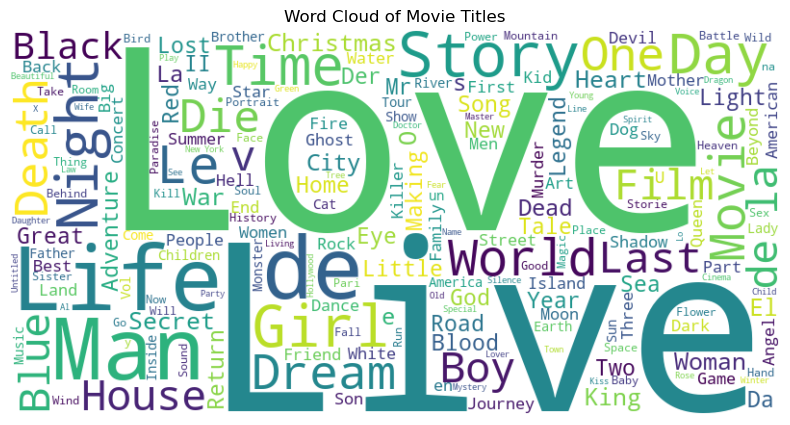

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'].dropna()))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

## **3.1** Asking meaningful question

<table style='float:left;'>
    <tr>
        <th style='text-align:center;'>STT</th>
        <th style='text-align:center;'>Nội dung</th>
        <th style='text-align:center;'>Trình bày</th>
    </tr>
    <tr>
        <td style='text-align:center;'>1</td>
        <td style='text-align:left;'>Nội dung</td>
        <td style='text-align:center;'><a href='#cauhoi_1'>C1</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>2</td>
        <td style='text-align:left;'>Nội dung</td>
        <td style='text-align:center;'><a href='#cauhoi_2'>C2</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>3</td>
        <td style='text-align:left;'></td>
        <td style='text-align:center;'><a href='#cauhoi_3'>C3</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>4</td>
        <td style='text-align:left;'>Nội dung</td>
        <td style='text-align:center;'><a href='#cauhoi_4'>C4</a></td>
    </tr>
    <tr>
        <td style='text-align:center;'>5</td>
        <td style='text-align:left;'>Với mỗi phim mà người dùng tìm kiếm hoặc đã xem, ta cần đề xuất thêm các phim nào với nội dung/thể loại/... tương tự cho người dùng?</td>
        <td style='text-align:center;'><a href='#cauhoi_5'>C5</a></td>
    </tr>
</table>

# **Phase 4**: Analyzing data to answer each question

### **Câu hỏi 1**: ghi nội dung ở đây<a name="cauhoi_1"></a>

**Ý nghĩa:**

### **Câu hỏi 2**: ghi nội dung ở đây<a name="cauhoi_2"></a>

**Ý nghĩa:**

### **Câu hỏi 3**: ghi nội dung ở đây<a name="cauhoi_3"></a>

**Ý nghĩa:**

### **Câu hỏi 4**: ghi nội dung ở đây<a name="cauhoi_4"></a>

**Ý nghĩa:**

### **Câu hỏi 5**: Với mỗi phim mà người dùng tìm kiếm hoặc đã xem, ta cần đề xuất thêm các phim nào với nội dung/thể loại/... tương tự cho người dùng?<a name="cauhoi_5"></a>

**Ý nghĩa:** Việc đưa ra phương pháp tiếp cận để trả lời được câu hỏi sẽ mang lại lợi ích cho người dùng và hơn nữa là lợi ích lớn cho nền tảng chiếu phim/nhà sản xuất phim.
- Đối với người dùng: việc gợi ý giúp người dùng dễ dàng tìm kiếm những bộ phim mới mà họ có thể quan tâm dựa trên sở thích và lịch sử xem phim trước đó. Từ đó giúp tiết kiệm thời gian tìm kiếm trong hàng ngàn bộ phim, nâng cao trải nghiệm và tạo điều kiện tiếp cận những bộ phim mà có thể người dùng chưa biết.
- Đối với nền tảng phân phối phim: Hệ thống gợi ý có thể tăng cường tính tương tác giữa người dùng và nền tảng. Việc cung cấp gợi ý phim chính xác giúp xây dựng ấn tượng tích cực giữa người dùng và nền tảng, tăng khả năng họ trở lại để xem thêm nhiều nội dung khác. Giống như đối với lĩnh vực âm nhạc, Spotify bằng khả năng đưa ra gợi ý chính xác giúp tăng khả năng lôi kéo và giữ chân người dùng. Ngoài ra, việc giúp người dùng tiếp cận với càng nhiều phim càng tốt (những phim phù hợp với sở thích) sẽ mang lợi nguồn lợi nhuận cho nền tảng đó.

**Thực hiện**: Khi xây dựng một hệ thống gợi ý (recommend) phim, ta có thể có hai hướng tiếp cận như sau:
- *Demographic Filtering*: Đưa ra các đề xuất chung cho mọi người dùng. Việc này dựa trên mức độ phổ biến của phim/thể loại phim, tức là các phim được đánh giá cao hay có độ phổ biến lớn sẽ được đề xuất cho người dùng. Có thể lấy ví dụ các Youtube Trending hay Global Top 10 Netflix, ... Hướng tiếp cận này quá đơn giản (do mỗi người đều có sở thích khác nhau) và chỉ đưa ra các phim có khả năng phù hợp cho đại chúng.
- *Content Based Filtering*: Đề xuất các phim có nội dung/thể loại/... tương tự dựa trên bộ phim người dùng tìm kiếm. Ý tưởng đơn giản là nếu người dùng thích một bộ phim thì có khả năng người dùng sẽ thích các bộ phim tương tự vậy.
Lúc này, ta sẽ đi qua cả hai hướng tiếp cận để cài đặt cho hệ thống gợi ý ở đây.

#### 3.1 **Demographic Filtering**: gợi ý phim dựa trên đánh giá trung bình

Tạo mới dataframe mới df3 với các thông tin cần thiết.

In [ ]:
#selected_columns = ['id', 'title', 'release_date', 'vote_average', 'vote_count', 'poster_path', 'adult', 'original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
selected_columns = ['id', 'title', 'release_date', 'vote_average', 'vote_count', 'poster_path', 'original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
df3 = df[selected_columns]
df3 = df3.fillna('')
df3.head(2)

Tiếp theo, ta tiến hành tính điểm cho mỗi bộ phim để sắp xếp các phim theo thứ tự đánh giá cao nhất đến thấp nhất.<br>
Ở đây, để sắp xếp các bộ phim theo đánh giá, ta không thể sử dụng giá trị `vote_average` để đảm bảo tính công bằng (Ví dụ một bộ phim có điểm rất cao nhưng số vote lại rất ít sẽ không thể so sánh với một bộ phim có điểm thấp hơn nhưng số vote rất cao). Do đó, ta sẽ sử dụng weighted rating (điểm đánh giá có trọng số) được tính như sau: $$\text{Weighted Rating: }wr = \left(\dfrac{v}{v+m}\times R\right)\left(\dfrac{m}{v+m}\times C\right)$$
Trong đó:
+ $v$: số lượng vote `vote_count`
+ $m$: số lượng vote ít nhất cần thiết để có thể tính $wr$.
+ $R$: điểm vote trung bình `vote_average`.
+ $C$: điểm vote trung bình toàn bộ dataset.
<br>

Đầu tiên ta tính giá trị $C$ và xác định giá trị $m$

In [ ]:
#Giá trị vote trung bình toàn bộ dataset
C = df3.loc[:, 'vote_average'].mean()
#Xác định giá trị m: để được xếp là phim phổ biến thì nó phải có số vote hơn 98% số phim
m = df3.loc[:, 'vote_count'].quantile(0.98)

Ta lọc các phim đáp ứng điều kiện và tính Weighted Rating ($wr$).

In [ ]:
best_rating_movie = df3.copy().loc[df3['vote_count'] >= m]
best_rating_movie['weighted_vote'] = (best_rating_movie['vote_count']/(best_rating_movie['vote_count']+m)*best_rating_movie['vote_average']) + (m/(best_rating_movie['vote_count']+m)*C)
best_rating_movie = best_rating_movie.sort_values('weighted_vote', ascending=False)

In [ ]:
#show top movie
def gettop_movie(year=None):
    if year is None:
        best_rating_movie = df3.copy().loc[df3['vote_count'] >= m]
    else:
        best_rating_movie = df3[df3['release_date'].dt.year == int(year)].copy().loc[df3['vote_count'] >= m]
    #
    best_rating_movie['weighted_vote'] = (best_rating_movie['vote_count']/(best_rating_movie['vote_count']+m)*best_rating_movie['vote_average']) + (m/(best_rating_movie['vote_count']+m)*C)
    best_rating_movie = best_rating_movie.sort_values('weighted_vote', ascending=False)
    return best_rating_movie
    
def showtop_movie(movie = 5, year = None):
    best_rating_movie = gettop_movie(year)
    fig, ax = plt.subplots(1, movie , figsize=(25,10))
    ax = ax.flatten()
    for i in range(movie):
        try:
            ax[i].axis('off')
            ax[i].set_title(best_rating_movie.iloc[i].title, fontsize=22)
            a = io.imread('https://image.tmdb.org/t/p/w500/' + best_rating_movie.iloc[i].poster_path)
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    if year is None:
        fig.suptitle('Top ' + str(movie) + ' movies of all time', fontsize = 28)
    else:
        fig.suptitle('Top ' + str(movie) + ' movies of ' + str(year), fontsize = 28)
    fig.show()

In [ ]:
#Top 5 phim phổ biển trong toàn bộ các phim
showtop_movie(5)

In [ ]:
#Top 5 phim phổ biển nhất năm 2023
showtop_movie(5, 2023)

#### 3.2 **Content Based Filtering**: gợi ý phim dựa trên mức độ tương đồng với tìm kiếm.

- Đầu tiên ta lựa chọn các cột có liên quan đến thông tin phim nhằm đánh giá độ tương đồng để dự đoán những phim mà tương đồng với sở thích người dùng. Ta sẽ lựa chọn các yếu tố để rút trích đặc trưng, bao gồm: [`adult`, `original_language`, `overview`, `tagline`, `genres`, `production_companies`, `production_countries`, `spoken_languages`].
- Việc đưa ra các yếu tố đó để đánh giá mức độ liên quan của các bộ phim có thể hiểu thông qua một vài ví dụ sau:
    - Với thể loại phim hành động (genres), người ta thường sẽ thích các phim hành động âu mỹ (production_countries) tuy nhiên ở đây sẽ chia thành 2 kiểu, một kiểu sẽ thích các phim hành động không có quá nhiều yếu tố bạo lực (siêu anh hùng), một kiểu sẽ ưu thích các bộ phim bạo lực hơn và sẽ không phù hợp cho các lứa tuổi nhỏ (adult). 
    - Với các phim hoạt hình (genres), sẽ có người thích cách kể chuyện của Âu Mĩ (Pixar, Disney, ...) hoặc của Châu Á (Studio Ghibli).
    - Với các phim gia đình, tình cảm, người ta cũng sẽ thường lựa chọn theo hai xu hương Âu-Mĩ (Pháp, Thụy Điển, ...) hoặc Châu Á (Hàn Quốc, Trung Quốc, Thái Lan, ...)
    - Các phần như 'tagline', 'overview' cũng sẽ thể hiện một phần nào đó nội dung phim để ta có thể tìm kiếm những bộ có nội dung tương tự.

In [ ]:
selected_columns = ['original_language', 'overview', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

Ta tạo cột `summary` nhằm tổng hợp tất cả thông tin từ các cột đã lựa chọn cho quá trình rút trích đặc trưng.

In [ ]:
df3.loc[:, 'summary'] = ''
df3.summary = df3.original_language + ' ' + df3.spoken_languages.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.overview + ' ' + df3.tagline  + ' ' + df3.genres.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.production_companies.apply(lambda x: ' '.join(x.split(','))) + ' ' + df3.production_countries.apply(lambda x: ' '.join(x.split(',')))
df3.loc[:, 'summary'].head()

Trích xuất đặc trưng sử dụng TF-IDF

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df3['summary'])
tfidf_matrix.shape

Chúng ta sẽ tính điểm tương đồng theo cặp cho tất cả các phim dựa trên TF-IDF vừa tính được và đề xuất phim dựa trên các đề xuất đó.

In [ ]:
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df3.index[df3['title'] == title][0]
    
    if df3.loc[idx, 'poster_path'] != ' ' and df3.loc[idx, 'poster_path'] is not None:
        poster = io.imread(f'https://image.tmdb.org/t/p/w500/{df3.loc[idx, "poster_path"]}')
        plt.imshow(poster)
        plt.axis('off')
        plt.title(title)
        plt.show()
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 8 most similar movies
    sim_scores = sim_scores[1:9]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 8 most similar movies
    result = df3.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i in range(8):
        try:    
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title, fontsize=15)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/' + result.iloc[i].poster_path)
            ax[i].imshow(a)
        except:
            try:
                ax[i].axis('off')
                ax[i].set_title(result.iloc[i].title, fontsize=15)
                a = io.imread(f'https://www.themoviedb.org/t/p/original/uc4RAVW1T3T29h6OQdr7zu4Blui.jpg')
                ax[i].imshow(a)
            except: pass
    fig.tight_layout()
    fig.show()

In [ ]:
get_recommendations('The Avengers')

# **Phase 5**: Reflection

## 5.0 Team members

**Văn Bá Bảo Huy**
- Khó khăn:
    - Tìm kiếm bộ dữ liệu có các thông tin đa dạng để có thể thực hiện nhiều phân tích.
    - Xử lí dữ liệu để đưa ra câu trả lời cho câu hỏi tự đặt ra sao cho phù hợp.
    - Sử dụng github đối với loại file ipynb.
- Điều đã học được:
    - Sử dụng github đối với loại file ipynb.
    - Quá trình xử lý và hiển thị dữ liệu sao cho phù hợp nhất để đảm bảo việc truyền đạt thông tin.

**Nguyễn Thị Gái**
- Khó khăn:
- Điều đã học được:

**Nguyễn Thị Thanh Hoa**
- Khó khăn:
- Điều đã học được:

## 5.1 Team

Nếu có nhiều thời gian hơn, nhóm sẽ ...